<a href="https://colab.research.google.com/github/Durgam02/Data-Science/blob/main/Task_3_(Cat%26Dog_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Dataset- https://www.kaggle.com/datasets/marquis03/cats-and-dogs

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d marquis03/cats-and-dogs

Dataset URL: https://www.kaggle.com/datasets/marquis03/cats-and-dogs
License(s): Apache 2.0
 82% 8.00M/9.75M [00:01<00:00, 12.9MB/s]
100% 9.75M/9.75M [00:01<00:00, 9.12MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 275 files belonging to 2 classes.
Found 70 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
9/9 [==============================] - 61s 7s/step - loss: 4.7790 - accuracy: 0.6909 - val_loss: 11.0895 - val_accuracy: 0.3429
Epoch 2/10
9/9 [==============================] - 58s 7s/step - loss: 8.1915 - accuracy: 0.7018 - val_loss: 18.8323 - val_accuracy: 0.3429
Epoch 3/10
9/9 [==============================] - 59s 6s/step - loss: 6.2132 - accuracy: 0.7055 - val_loss: 29.5534 - val_accuracy: 0.3429
Epoch 4/10
9/9 [==============================] - 58s 6s/step - loss: 2.5240 - accuracy: 0.8545 - val_loss: 31.0528 - val_accuracy: 0.3429
Epoch 5/10
9/9 [==============================] - 72s 8s/step - loss: 1.8625 - accuracy: 0.8764 - val_loss: 39.0005 - val_accuracy: 0.3429
Epoch 6/10
9/9 [==============================] - 63s 7s/step - loss: 1.3326 - accuracy: 0.9018 - val_loss: 30.8204 - val_accuracy: 0.3429
Epoch 7/10
9/9 [==============================] - 61s 7s/step - loss: 1.0271 - accuracy: 0.9091 - val_loss: 39.2606 - val_accuracy: 0.3429
Epoch 8/10
9/9 [===========

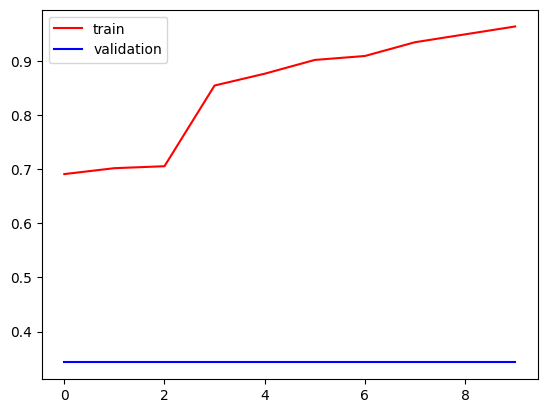

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

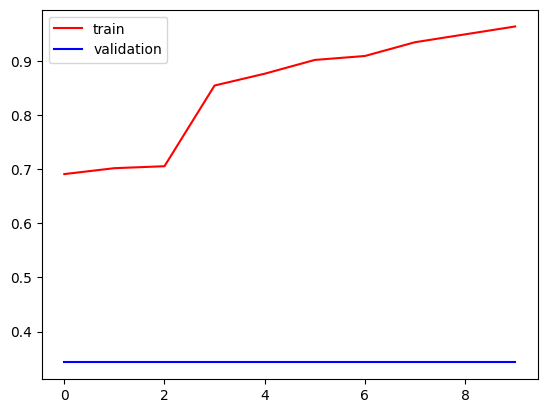

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

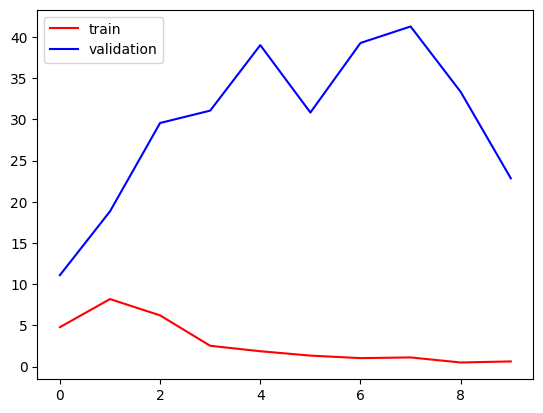

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

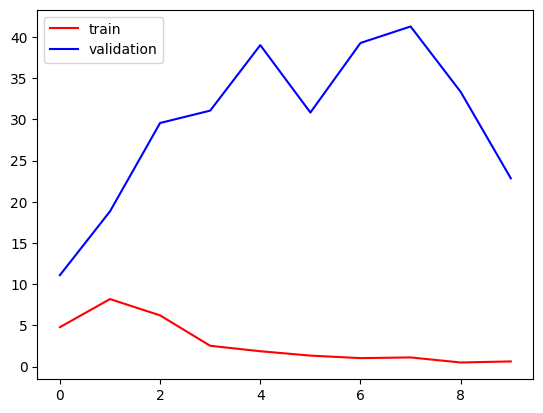

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

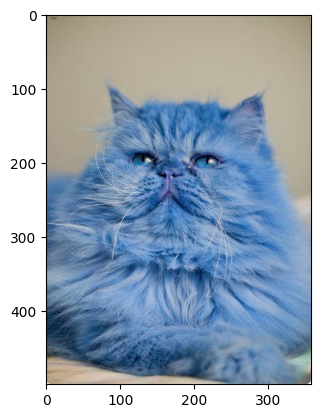

In [ ]:
import cv2
test_img = cv2.imread('/content/train/cat/Persian_140_jpg.rf.9f99f82bb76fc5e58b71707b6301f10d.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(500, 358, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 109ms/step


array([[1.]], dtype=float32)